Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce (1).csv


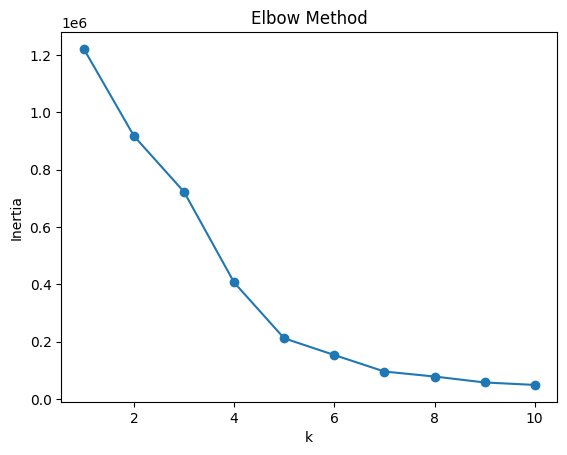

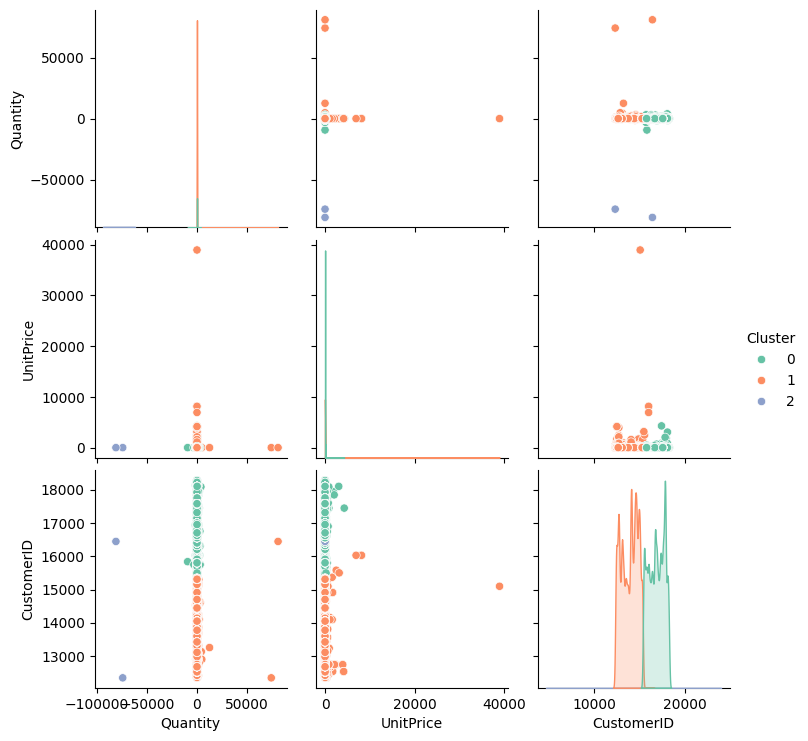

Cluster Centers:
        Quantity  UnitPrice    CustomerID
0     11.124519   2.987440  16869.705010
1     13.596956   3.874576  13902.815359
2 -77605.000000   1.560000  14396.000000


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
# Load dataset
df=pd.read_csv("9. Customer Segmentation in E-commerce.csv")

# Drop non-numeric or irrelevant columns (edit as needed)
df=df.select_dtypes(include=['float64','int64'])

# Handle missing values
df.dropna(inplace=True)

# Standardize features
scaler=StandardScaler()
scaled=scaler.fit_transform(df)

# Elbow method to find optimal k
inertia=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,11),inertia,'-o');plt.xlabel('k');plt.ylabel('Inertia');plt.title('Elbow Method');plt.show()

# Fit KMeans with optimal k (change 3 if elbow suggests differently)
kmeans=KMeans(n_clusters=3,random_state=42)
df['Cluster']=kmeans.fit_predict(scaled)

# Visualize clusters (using first 2 principal components if too many features)
sns.pairplot(df,hue='Cluster',palette='Set2');plt.show()

# Optional: show cluster centroids
centroids=pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),columns=df.columns[:-1])
print("Cluster Centers:\n",centroids)

